<a href="https://colab.research.google.com/github/kaushikRajGhimire/Data-Science-Masters-Certification/blob/main/CV%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d ashwingupta3012/human-faces

Dataset URL: https://www.kaggle.com/datasets/ashwingupta3012/human-faces
License(s): CC0-1.0
100% 1.81G/1.82G [00:23<00:00, 68.1MB/s]
100% 1.82G/1.82G [00:23<00:00, 83.4MB/s]


In [ ]:
!unzip /content/human-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: Humans/1 (2910).jpg     
  inflating: Humans/1 (2911).jpg     
  inflating: Humans/1 (2912).jpg     
  inflating: Humans/1 (2913).jpg     
  inflating: Humans/1 (2914).jpg     
  inflating: Humans/1 (2915).jpg     
  inflating: Humans/1 (2916).jpg     
  inflating: Humans/1 (2917).jpg     
  inflating: Humans/1 (2918).jpg     
  inflating: Humans/1 (2919).jpg     
  inflating: Humans/1 (292).jpg      
  inflating: Humans/1 (2920).jpg     
  inflating: Humans/1 (2921).jpg     
  inflating: Humans/1 (2922).jpg     
  inflating: Humans/1 (2923).jpg     
  inflating: Humans/1 (2924).jpg     
  inflating: Humans/1 (2925).jpg     
  inflating: Humans/1 (2926).jpg     
  inflating: Humans/1 (2927).jpg     
  inflating: Humans/1 (2928).jpg     
  inflating: Humans/1 (2929).jpg     
  inflating: Humans/1 (293).jpg      
  inflating: Humans/1 (2930).jpg     
  inflating: Humans/1 (2931).jpg     
  inflating: Humans/1 (2932).jpg     

In [ ]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


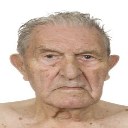

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread("/content/Humans/1 (100).jpg")
image = cv2.resize(image,(128,128))
cv2_imshow(image)

In [ ]:
from ultralytics import YOLO
import os
import cv2
from google.colab.patches import cv2_imshow

facemodel = YOLO("/content/gdrive/MyDrive/yolov8m-face.pt")

home = "/content/Humans"
count = 0

for image in os.listdir(home):
  image_path = os.path.join(home, image)
  face_image = cv2.imread(image_path)
  if face_image is not None :
    face_image = cv2.resize(face_image,(64,64))
    face_result = facemodel.predict(face_image,conf = 0.5)
    for info in face_result:
      parameters = info.boxes
      for box in info.boxes :
        x1 , y1 , x2 , y2 = box.xyxy[0]
        x1 , y1 , x2 , y2 = int(x1),int(y1),int(x2),int(y2)
        h , w = y2-y1 , x2-x1
        x1 = max(0, x1 - 5)
        y1 = max(0, y1 - 5)
        x2 = min(face_image.shape[1]+2, x2 + 6)
        y2 = min(face_image.shape[0]+2, y2 + 6)
        face_image = face_image[y1:y2, x1:x2].copy()
        if face_image.size > 0 :
          output_path = os.path.join(("/content/Humans/faces2"+"/"+image))
          cv2.imwrite(output_path,face_image)
          count += 1
print(count)


Streaming output truncated to the last 5000 lines.
0: 960x960 1 face, 40.7ms
Speed: 5.0ms preprocess, 40.7ms inference, 1.4ms postprocess per image at shape (1, 3, 960, 960)

0: 960x960 1 face, 39.7ms
Speed: 4.4ms preprocess, 39.7ms inference, 1.4ms postprocess per image at shape (1, 3, 960, 960)

0: 960x960 1 face, 41.5ms
Speed: 6.6ms preprocess, 41.5ms inference, 1.9ms postprocess per image at shape (1, 3, 960, 960)

0: 960x960 1 face, 42.1ms
Speed: 4.7ms preprocess, 42.1ms inference, 1.8ms postprocess per image at shape (1, 3, 960, 960)

0: 960x960 1 face, 42.2ms
Speed: 6.9ms preprocess, 42.2ms inference, 1.6ms postprocess per image at shape (1, 3, 960, 960)

0: 960x960 1 face, 41.6ms
Speed: 4.4ms preprocess, 41.6ms inference, 1.4ms postprocess per image at shape (1, 3, 960, 960)

0: 960x960 1 face, 40.7ms
Speed: 4.5ms preprocess, 40.7ms inference, 1.5ms postprocess per image at shape (1, 3, 960, 960)

0: 960x960 1 face, 41.9ms
Speed: 5.2ms preprocess, 41.9ms inference, 1.5ms postpr

6256


In [ ]:
import os

directory = "/content/Humans"
file_count = len(os.listdir(directory))
print("Number of files in directory:", file_count)

Number of files in directory: 7221


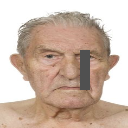

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/Humans/1 (100).jpg")
image = cv2.resize(image,(128,128))
image[50:90,80:90] = 80
cv2_imshow(image)

In [ ]:
import os
import cv2
import numpy as np

resized_1 = []
resized_2 = []
datadirectory = "/content/Humans/faces2"
def training_data():
    for img in os.listdir(datadirectory):
        try:
            image = cv2.imread(os.path.join(datadirectory, img), cv2.IMREAD_COLOR)
            new_image = cv2.resize(image, (128, 128))
            resized_1.append(new_image)
            image = cv2.GaussianBlur(image,(15,15),0)
            uniform_noise = np.zeros((image.shape),dtype = np.uint8)
            cv2.randu(uniform_noise ,0 ,255)
            np.random.seed(None)
            # x = np.random.normal(loc=20,scale=20)
            # y = np.random.normal(loc=20,scale=20)
            uniform_noise = (uniform_noise*0.002).astype(np.uint8)
            np.random.seed(42)
            alpha = np.random.normal(loc = 0.5, scale= 0.3)
            beta = 0
            image =  cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
            noise_filtered_image = cv2.add(image,uniform_noise)
            noisy_image = cv2.resize(noise_filtered_image,(64,64))
            # noisy_image[int(x):int(x+20),int(y):int(y+10)] = 80
            resized_2.append(noisy_image)
        except Exception as e:
            pass

training_data()
print(len(resized_1))
print(len(resized_2))

6088
6088


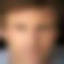

SSIM: 0.4504075744306054


In [ ]:
import cv2
import torch
from skimage.metrics import structural_similarity as ssim
from google.colab.patches import cv2_imshow
# Assuming you have already loaded and resized your images (temporary and resized_2)

temporary = cv2.imread("/content/r3.jpg")
alpha = 1
beta = 0
temporary =  cv2.convertScaleAbs(temporary, alpha=alpha, beta=beta)
temporary = cv2.resize(temporary,(64,64))
cv2_imshow(temporary)
temporary_tensor = torch.tensor(temporary / 255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
resized_2_tensor = torch.tensor(resized_2[0] / 255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
ssim_value = ssim(temporary_tensor.squeeze(0).numpy().astype(np.float64), resized_2_tensor.squeeze(0).numpy().astype(np.float64),win_size=3,channel_axis = -1)
print("SSIM:", ssim_value)


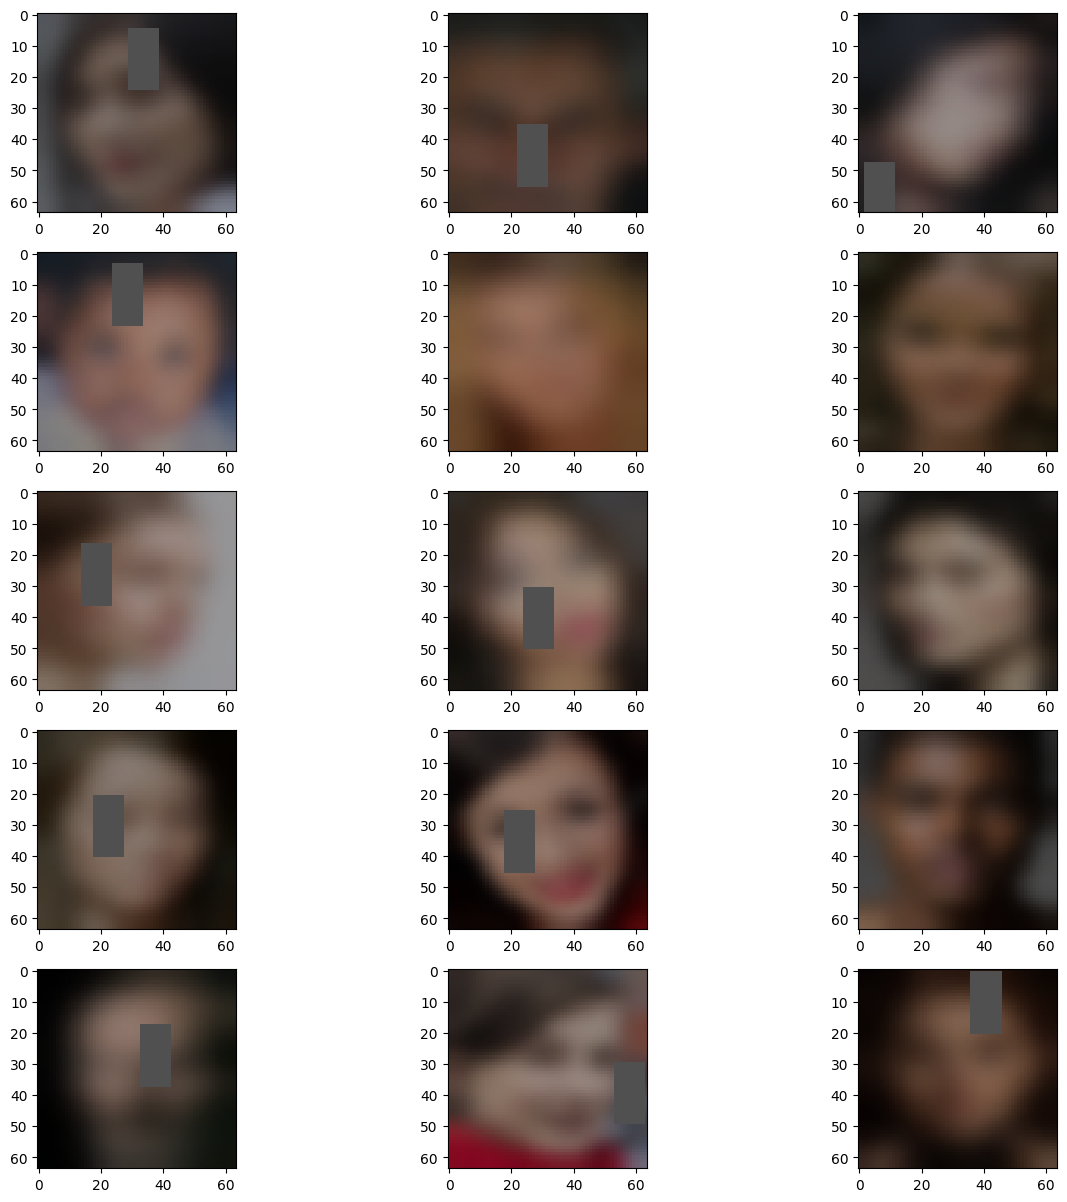

In [ ]:
import cv2
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15, 15))
rows = 5
columns = 3
count = 0
for images in resized_2:
    count += 1
    if count > rows*columns:
        break
    figure.add_subplot(rows, columns, count)
    images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
    plt.imshow(images)
plt.show()


In [ ]:
print(len(resized_1))
print(len(resized_2))

6088
6088


In [ ]:
pip install git+https://github.com/sberbank-ai/Real-ESRGAN.git

  Cloning https://github.com/sberbank-ai/Real-ESRGAN.git to /tmp/pip-req-build-pkzoqfi3
  Running command git clone --filter=blob:none --quiet https://github.com/sberbank-ai/Real-ESRGAN.git /tmp/pip-req-build-pkzoqfi3
  Resolved https://github.com/sberbank-ai/Real-ESRGAN.git to commit 362a0316878f41dbdfbb23657b450c3353de5acf
  Preparing metadata (setup.py) ... done


In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(resized_2,resized_1,test_size = 0.2 ,random_state = 42)
print(resized_1[0].shape)
print(resized_2[0].shape)

(128, 128, 3)
(64, 64, 3)


In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

class Faces():
  def __init__(self,inputs,outputs,transforms = None):
    self.inputs = inputs
    self.outputs = outputs
    self.transforms = transforms

  def __len__(self):
    return len(self.inputs)

  def __getitem__(self,idx):
    input_image = self.inputs[idx]
    target_image = self.outputs[idx]
    if self.transforms:
        input_image = self.transforms(input_image)
        target_image = self.transforms(target_image)
    return input_image, target_image

train_transform = transforms.Compose([
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
])


training_dataset = Faces(x_train,y_train,transforms = train_transform)
testing_dataset = Faces(x_test,y_test,transforms = test_transform)

train_loader = DataLoader(training_dataset , batch_size = 32, shuffle = True)
test_loader = DataLoader(testing_dataset , batch_size = 32, shuffle = False)


In [ ]:
!pip install basicsr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 27.7 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214818 sha256=7b33525732b8d5c07ed32749f5f5a7f479b6f95691eed252e314f012d0ba0a54
  Stored in directory: /root/.cache/pip/wheels/38/83/99/2d8437cc652a01af27df5ff037a4075e95b52d67705c5f30ca
Successfully built basicsr


Epoch [1/80], Step[40/153], Loss: 0.5395585894584656, Adversarial Loss: 0.032418012619018555, Perceptual Loss: 1.7228864431381226, PSNR: 5.5986647605896 dB
Epoch [1/80], Step[80/153], Loss: 0.5313777923583984, Adversarial Loss: 0.01975901797413826, Perceptual Loss: 1.7251547574996948, PSNR: 5.326955318450928 dB
Epoch [1/80], Step[120/153], Loss: 0.4623570442199707, Adversarial Loss: 0.019264090806245804, Perceptual Loss: 1.496240496635437, PSNR: 5.484038352966309 dB


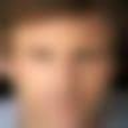

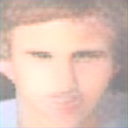

Epoch [1/80], Training Loss: 0.548519998009688, Training PSNR: 6.5648019547555965 dB, Test Loss: 0.44245986296580386, Test PSNR: 5.441515078911414 dB
Epoch [2/80], Step[40/153], Loss: 0.42728060483932495, Adversarial Loss: 0.017967775464057922, Perceptual Loss: 1.3823437690734863, PSNR: 5.396792888641357 dB
Epoch [2/80], Step[80/153], Loss: 0.41805723309516907, Adversarial Loss: 0.017270004376769066, Perceptual Loss: 1.3532273769378662, PSNR: 5.682037353515625 dB
Epoch [2/80], Step[120/153], Loss: 0.42328232526779175, Adversarial Loss: 0.016766510903835297, Perceptual Loss: 1.3718191385269165, PSNR: 5.20072078704834 dB


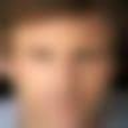

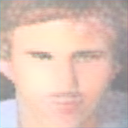

Epoch [2/80], Training Loss: 0.4214386234875598, Training PSNR: 5.3312336105147216 dB, Test Loss: 0.4070752469392923, Test PSNR: 5.219666725549942 dB
Epoch [3/80], Step[40/153], Loss: 0.42114001512527466, Adversarial Loss: 0.016932884231209755, Perceptual Loss: 1.3642899990081787, PSNR: 5.694868564605713 dB
Epoch [3/80], Step[80/153], Loss: 0.40153777599334717, Adversarial Loss: 0.019609641283750534, Perceptual Loss: 1.29270339012146, PSNR: 4.919683456420898 dB
Epoch [3/80], Step[120/153], Loss: 0.38025277853012085, Adversarial Loss: 0.018342450261116028, Perceptual Loss: 1.22471022605896, PSNR: 5.01881217956543 dB


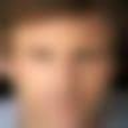

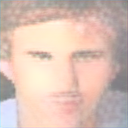

Epoch [3/80], Training Loss: 0.3901864126616833, Training PSNR: 5.281724409340254 dB, Test Loss: 0.387441479242765, Test PSNR: 5.1574177742004395 dB
Epoch [4/80], Step[40/153], Loss: 0.35287198424339294, Adversarial Loss: 0.016078751534223557, Perceptual Loss: 1.1387228965759277, PSNR: 5.113086700439453 dB
Epoch [4/80], Step[80/153], Loss: 0.37453800439834595, Adversarial Loss: 0.017379770055413246, Perceptual Loss: 1.2079071998596191, PSNR: 6.050810813903809 dB
Epoch [4/80], Step[120/153], Loss: 0.32425203919410706, Adversarial Loss: 0.018050992861390114, Perceptual Loss: 1.0387210845947266, PSNR: 5.407318592071533 dB


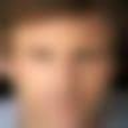

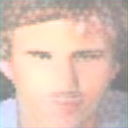

Epoch [4/80], Training Loss: 0.3687061001272762, Training PSNR: 5.261703260583816 dB, Test Loss: 0.3741324696785364, Test PSNR: 5.25050600981101 dB
Epoch [5/80], Step[40/153], Loss: 0.3501557409763336, Adversarial Loss: 0.019278477877378464, Perceptual Loss: 1.1222026348114014, PSNR: 5.323125839233398 dB
Epoch [5/80], Step[80/153], Loss: 0.32416778802871704, Adversarial Loss: 0.019183238968253136, Perceptual Loss: 1.0357983112335205, PSNR: 4.5563812255859375 dB
Epoch [5/80], Step[120/153], Loss: 0.3568919003009796, Adversarial Loss: 0.019772879779338837, Perceptual Loss: 1.143502950668335, PSNR: 5.392082214355469 dB


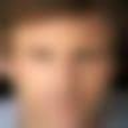

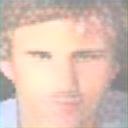

Epoch [5/80], Training Loss: 0.3517008384847953, Training PSNR: 5.250133442722894 dB, Test Loss: 0.36530523498853046, Test PSNR: 5.121017822852502 dB
Epoch [6/80], Step[40/153], Loss: 0.34444916248321533, Adversarial Loss: 0.018419384956359863, Perceptual Loss: 1.1051852703094482, PSNR: 5.091215133666992 dB
Epoch [6/80], Step[80/153], Loss: 0.35272520780563354, Adversarial Loss: 0.017278172075748444, Perceptual Loss: 1.1354349851608276, PSNR: 5.7637619972229 dB
Epoch [6/80], Step[120/153], Loss: 0.3386763632297516, Adversarial Loss: 0.020246317610144615, Perceptual Loss: 1.0816797018051147, PSNR: 5.401976108551025 dB


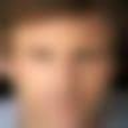

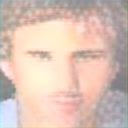

Epoch [6/80], Training Loss: 0.338469746650434, Training PSNR: 5.24747472027548 dB, Test Loss: 0.35864100853602093, Test PSNR: 5.067884457417024 dB
Epoch [7/80], Step[40/153], Loss: 0.3307007849216461, Adversarial Loss: 0.017580488696694374, Perceptual Loss: 1.0613148212432861, PSNR: 4.646088600158691 dB
Epoch [7/80], Step[80/153], Loss: 0.33397823572158813, Adversarial Loss: 0.01798565499484539, Perceptual Loss: 1.0712941884994507, PSNR: 5.084447860717773 dB
Epoch [7/80], Step[120/153], Loss: 0.30565765500068665, Adversarial Loss: 0.017739256843924522, Perceptual Loss: 0.9774672985076904, PSNR: 5.306504249572754 dB


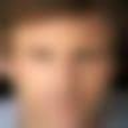

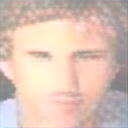

Epoch [7/80], Training Loss: 0.32546068718230803, Training PSNR: 5.238505086088492 dB, Test Loss: 0.3503542924538637, Test PSNR: 5.188305267920861 dB
Epoch [8/80], Step[40/153], Loss: 0.3227860927581787, Adversarial Loss: 0.018311118707060814, Perceptual Loss: 1.0332276821136475, PSNR: 4.9953484535217285 dB
Epoch [8/80], Step[80/153], Loss: 0.2993597090244293, Adversarial Loss: 0.01775570958852768, Perceptual Loss: 0.9564356803894043, PSNR: 5.062494277954102 dB
Epoch [8/80], Step[120/153], Loss: 0.31134673953056335, Adversarial Loss: 0.017844561487436295, Perceptual Loss: 0.9961851239204407, PSNR: 5.864151954650879 dB


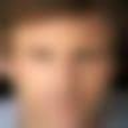

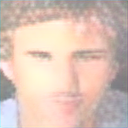

Epoch [8/80], Training Loss: 0.31437187744121925, Training PSNR: 5.223725078931821 dB, Test Loss: 0.34524662295977276, Test PSNR: 5.0888931690118255 dB
Epoch [9/80], Step[40/153], Loss: 0.3012607991695404, Adversarial Loss: 0.01908711902797222, Perceptual Loss: 0.9596660137176514, PSNR: 5.17604398727417 dB
Epoch [9/80], Step[80/153], Loss: 0.2847641706466675, Adversarial Loss: 0.01817493885755539, Perceptual Loss: 0.9068056344985962, PSNR: 4.990063190460205 dB
Epoch [9/80], Step[120/153], Loss: 0.32464197278022766, Adversarial Loss: 0.017211582511663437, Perceptual Loss: 1.0419795513153076, PSNR: 5.348414897918701 dB


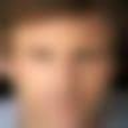

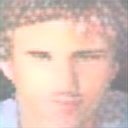

Epoch [9/80], Training Loss: 0.30465195673743106, Training PSNR: 5.22035300186257 dB, Test Loss: 0.33878582563155735, Test PSNR: 5.144169807434082 dB
Epoch [10/80], Step[40/153], Loss: 0.28555434942245483, Adversarial Loss: 0.01914272829890251, Perceptual Loss: 0.9071815013885498, PSNR: 5.283378601074219 dB
Epoch [10/80], Step[80/153], Loss: 0.3004899024963379, Adversarial Loss: 0.017348941415548325, Perceptual Loss: 0.9611520767211914, PSNR: 5.717893600463867 dB
Epoch [10/80], Step[120/153], Loss: 0.28160929679870605, Adversarial Loss: 0.01874556392431259, Perceptual Loss: 0.8949579000473022, PSNR: 4.806882381439209 dB


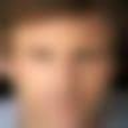

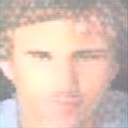

Epoch [10/80], Training Loss: 0.2954568859019311, Training PSNR: 5.223858936160219 dB, Test Loss: 0.33504631886115444, Test PSNR: 5.0426509624872455 dB
Epoch [11/80], Step[40/153], Loss: 0.29658690094947815, Adversarial Loss: 0.018676407635211945, Perceptual Loss: 0.945044755935669, PSNR: 5.639958381652832 dB
Epoch [11/80], Step[80/153], Loss: 0.27501511573791504, Adversarial Loss: 0.01784065179526806, Perceptual Loss: 0.8750888109207153, PSNR: 4.980143070220947 dB
Epoch [11/80], Step[120/153], Loss: 0.28010475635528564, Adversarial Loss: 0.01802540197968483, Perceptual Loss: 0.8916232585906982, PSNR: 5.74662446975708 dB


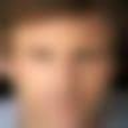

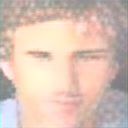

Epoch [11/80], Training Loss: 0.28737710153355317, Training PSNR: 5.223492089439841 dB, Test Loss: 0.3313376765984755, Test PSNR: 5.252166674687312 dB
Epoch [12/80], Step[40/153], Loss: 0.2662922143936157, Adversarial Loss: 0.019778918474912643, Perceptual Loss: 0.841489851474762, PSNR: 5.278695106506348 dB
Epoch [12/80], Step[80/153], Loss: 0.29103338718414307, Adversarial Loss: 0.01923489198088646, Perceptual Loss: 0.9252298474311829, PSNR: 5.535103797912598 dB
Epoch [12/80], Step[120/153], Loss: 0.2685188353061676, Adversarial Loss: 0.018674729391932487, Perceptual Loss: 0.8514883518218994, PSNR: 5.11648416519165 dB


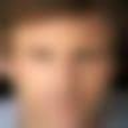

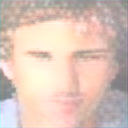

Epoch [12/80], Training Loss: 0.2797943669206956, Training PSNR: 5.219173796036664 dB, Test Loss: 0.3276646633942922, Test PSNR: 5.091671038896609 dB
Epoch [13/80], Step[40/153], Loss: 0.2488945871591568, Adversarial Loss: 0.019817698746919632, Perceptual Loss: 0.7834073305130005, PSNR: 5.203909873962402 dB
Epoch [13/80], Step[80/153], Loss: 0.26809027791023254, Adversarial Loss: 0.02057039737701416, Perceptual Loss: 0.8456366062164307, PSNR: 5.060251235961914 dB
Epoch [13/80], Step[120/153], Loss: 0.2626364231109619, Adversarial Loss: 0.019089389592409134, Perceptual Loss: 0.8309128284454346, PSNR: 5.375727653503418 dB


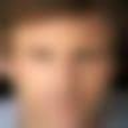

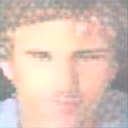

Epoch [13/80], Training Loss: 0.27196630124562704, Training PSNR: 5.213238320319481 dB, Test Loss: 0.324126823590352, Test PSNR: 5.124490071565677 dB
Epoch [14/80], Step[40/153], Loss: 0.26704010367393494, Adversarial Loss: 0.016949430108070374, Perceptual Loss: 0.8505849838256836, PSNR: 5.125840187072754 dB
Epoch [14/80], Step[80/153], Loss: 0.2698861360549927, Adversarial Loss: 0.017975203692913055, Perceptual Loss: 0.8576782941818237, PSNR: 5.072568893432617 dB
Epoch [14/80], Step[120/153], Loss: 0.25540393590927124, Adversarial Loss: 0.017981022596359253, Perceptual Loss: 0.809390664100647, PSNR: 5.323772430419922 dB


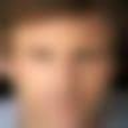

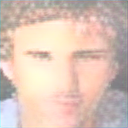

Epoch [14/80], Training Loss: 0.26497554068082296, Training PSNR: 5.207517988541547 dB, Test Loss: 0.3228792013266148, Test PSNR: 5.2308807006249065 dB
Epoch [15/80], Step[40/153], Loss: 0.24724197387695312, Adversarial Loss: 0.017808765172958374, Perceptual Loss: 0.7825860977172852, PSNR: 5.364559173583984 dB
Epoch [15/80], Step[80/153], Loss: 0.2400193065404892, Adversarial Loss: 0.017969246953725815, Perceptual Loss: 0.7581360936164856, PSNR: 4.996103763580322 dB
Epoch [15/80], Step[120/153], Loss: 0.25843721628189087, Adversarial Loss: 0.018475964665412903, Perceptual Loss: 0.8183467388153076, PSNR: 5.807036399841309 dB


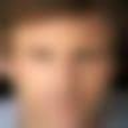

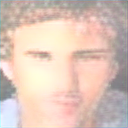

Epoch [15/80], Training Loss: 0.25901883382812824, Training PSNR: 5.208680854124181 dB, Test Loss: 0.32014035605467284, Test PSNR: 5.095058655127501 dB
Epoch [16/80], Step[40/153], Loss: 0.2393307238817215, Adversarial Loss: 0.018810207024216652, Perceptual Loss: 0.7538785934448242, PSNR: 5.16251802444458 dB
Epoch [16/80], Step[80/153], Loss: 0.25239405035972595, Adversarial Loss: 0.018090613186359406, Perceptual Loss: 0.7991020679473877, PSNR: 5.6363396644592285 dB
Epoch [16/80], Step[120/153], Loss: 0.25599387288093567, Adversarial Loss: 0.018370959907770157, Perceptual Loss: 0.8104473352432251, PSNR: 5.9000372886657715 dB


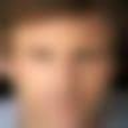

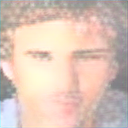

Epoch [16/80], Training Loss: 0.2535424869434506, Training PSNR: 5.209567098056569 dB, Test Loss: 0.31852516531944275, Test PSNR: 5.118936379750569 dB
Epoch [17/80], Step[40/153], Loss: 0.24940897524356842, Adversarial Loss: 0.01884276047348976, Perceptual Loss: 0.7873967885971069, PSNR: 5.192697048187256 dB
Epoch [17/80], Step[80/153], Loss: 0.25253137946128845, Adversarial Loss: 0.017781412228941917, Perceptual Loss: 0.800281286239624, PSNR: 5.183005332946777 dB
Epoch [17/80], Step[120/153], Loss: 0.2515367567539215, Adversarial Loss: 0.020004134625196457, Perceptual Loss: 0.7917795181274414, PSNR: 4.890986919403076 dB


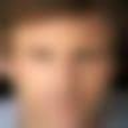

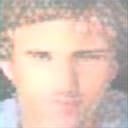

Epoch [17/80], Training Loss: 0.2483347400146372, Training PSNR: 5.20648913913303 dB, Test Loss: 0.3167638190281697, Test PSNR: 5.119467564118215 dB
Epoch [18/80], Step[40/153], Loss: 0.23408803343772888, Adversarial Loss: 0.01951642334461212, Perceptual Loss: 0.7347550988197327, PSNR: 5.1988749504089355 dB
Epoch [18/80], Step[80/153], Loss: 0.2472190409898758, Adversarial Loss: 0.022765379399061203, Perceptual Loss: 0.7709442377090454, PSNR: 5.500250339508057 dB
Epoch [18/80], Step[120/153], Loss: 0.2668169438838959, Adversarial Loss: 0.018497196957468987, Perceptual Loss: 0.846229612827301, PSNR: 5.257043361663818 dB


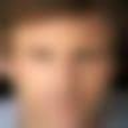

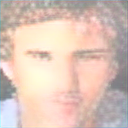

Epoch [18/80], Training Loss: 0.24364322794029136, Training PSNR: 5.208899261125552 dB, Test Loss: 0.3138199872695483, Test PSNR: 5.209171417431953 dB
Epoch [19/80], Step[40/153], Loss: 0.23233768343925476, Adversarial Loss: 0.019990285858511925, Perceptual Loss: 0.7278149127960205, PSNR: 5.176908493041992 dB
Epoch [19/80], Step[80/153], Loss: 0.23533090949058533, Adversarial Loss: 0.02102702669799328, Perceptual Loss: 0.7353732585906982, PSNR: 4.8038859367370605 dB
Epoch [19/80], Step[120/153], Loss: 0.2653079628944397, Adversarial Loss: 0.021135663613677025, Perceptual Loss: 0.8350432515144348, PSNR: 5.420099258422852 dB


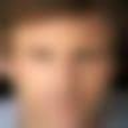

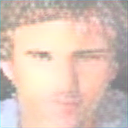

Epoch [19/80], Training Loss: 0.2379777860018163, Training PSNR: 5.209157784779866 dB, Test Loss: 0.31145051465584683, Test PSNR: 5.113405447739821 dB
Epoch [20/80], Step[40/153], Loss: 0.22809676826000214, Adversarial Loss: 0.02006107196211815, Perceptual Loss: 0.7135133743286133, PSNR: 5.328099250793457 dB
Epoch [20/80], Step[80/153], Loss: 0.243043914437294, Adversarial Loss: 0.019397566094994545, Perceptual Loss: 0.7648853659629822, PSNR: 4.949670791625977 dB
Epoch [20/80], Step[120/153], Loss: 0.2107776254415512, Adversarial Loss: 0.02097514271736145, Perceptual Loss: 0.6536500453948975, PSNR: 5.024127960205078 dB


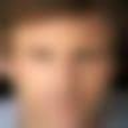

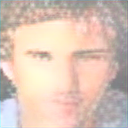

Epoch [20/80], Training Loss: 0.2330493945506663, Training PSNR: 5.2080437903310735 dB, Test Loss: 0.3111146971201285, Test PSNR: 5.127421238483527 dB
Epoch [21/80], Step[40/153], Loss: 0.2319795787334442, Adversarial Loss: 0.01737406477332115, Perceptual Loss: 0.7327257394790649, PSNR: 4.915730953216553 dB
Epoch [21/80], Step[80/153], Loss: 0.2370050847530365, Adversarial Loss: 0.018269263207912445, Perceptual Loss: 0.7473886013031006, PSNR: 5.257695198059082 dB
Epoch [21/80], Step[120/153], Loss: 0.2430918961763382, Adversarial Loss: 0.018565932288765907, Perceptual Loss: 0.7669857740402222, PSNR: 5.609267234802246 dB


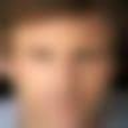

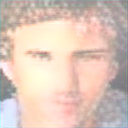

Epoch [21/80], Training Loss: 0.22872688441105138, Training PSNR: 5.211096766727422 dB, Test Loss: 0.3097781218015231, Test PSNR: 5.061293925994482 dB
Epoch [22/80], Step[40/153], Loss: 0.22559243440628052, Adversarial Loss: 0.01986970379948616, Perceptual Loss: 0.7056121230125427, PSNR: 4.5975823402404785 dB
Epoch [22/80], Step[80/153], Loss: 0.225331649184227, Adversarial Loss: 0.02154753915965557, Perceptual Loss: 0.7008278369903564, PSNR: 5.3846025466918945 dB
Epoch [22/80], Step[120/153], Loss: 0.2376115322113037, Adversarial Loss: 0.019148096442222595, Perceptual Loss: 0.7473595142364502, PSNR: 5.312365531921387 dB


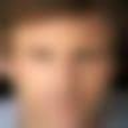

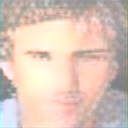

Epoch [22/80], Training Loss: 0.2254241612417246, Training PSNR: 5.2031873815199905 dB, Test Loss: 0.3082631975412369, Test PSNR: 5.037345715058156 dB
Epoch [23/80], Step[40/153], Loss: 0.20357422530651093, Adversarial Loss: 0.018534746021032333, Perceptual Loss: 0.6353330016136169, PSNR: 4.9382476806640625 dB
Epoch [23/80], Step[80/153], Loss: 0.2195907086133957, Adversarial Loss: 0.021498939022421837, Perceptual Loss: 0.6818047761917114, PSNR: 5.405407428741455 dB
Epoch [23/80], Step[120/153], Loss: 0.23440173268318176, Adversarial Loss: 0.018405523151159286, Perceptual Loss: 0.7383928298950195, PSNR: 5.080316066741943 dB


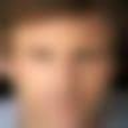

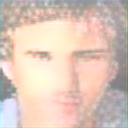

Epoch [23/80], Training Loss: 0.22143826784651263, Training PSNR: 5.204522326101665 dB, Test Loss: 0.3076634399401836, Test PSNR: 5.108795642852783 dB
Epoch [24/80], Step[40/153], Loss: 0.23028521239757538, Adversarial Loss: 0.0200183242559433, Perceptual Loss: 0.7209079265594482, PSNR: 5.385697364807129 dB
Epoch [24/80], Step[80/153], Loss: 0.2108902633190155, Adversarial Loss: 0.020834874361753464, Perceptual Loss: 0.6543528437614441, PSNR: 5.042631149291992 dB
Epoch [24/80], Step[120/153], Loss: 0.20504821836948395, Adversarial Loss: 0.02104157954454422, Perceptual Loss: 0.6343969702720642, PSNR: 5.371703147888184 dB


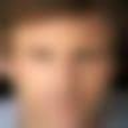

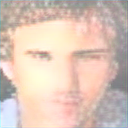

Epoch [24/80], Training Loss: 0.21772331612951615, Training PSNR: 5.201118609484504 dB, Test Loss: 0.30542784012280977, Test PSNR: 5.162401346059946 dB
Epoch [25/80], Step[40/153], Loss: 0.1975746750831604, Adversarial Loss: 0.020368022844195366, Perceptual Loss: 0.6110568642616272, PSNR: 5.138625621795654 dB
Epoch [25/80], Step[80/153], Loss: 0.21952660381793976, Adversarial Loss: 0.02013237029314041, Perceptual Loss: 0.6847798228263855, PSNR: 5.150924205780029 dB
Epoch [25/80], Step[120/153], Loss: 0.20446662604808807, Adversarial Loss: 0.019944246858358383, Perceptual Loss: 0.6350188255310059, PSNR: 5.505988121032715 dB


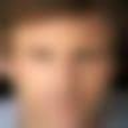

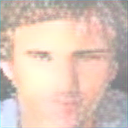

Epoch [25/80], Training Loss: 0.21344955255782683, Training PSNR: 5.2020225649565655 dB, Test Loss: 0.30494165879029494, Test PSNR: 5.135311903097691 dB
Epoch [26/80], Step[40/153], Loss: 0.2066977322101593, Adversarial Loss: 0.019965553656220436, Perceptual Loss: 0.6424061059951782, PSNR: 5.392722129821777 dB
Epoch [26/80], Step[80/153], Loss: 0.1965775191783905, Adversarial Loss: 0.0187680646777153, Perceptual Loss: 0.6114662289619446, PSNR: 4.6258039474487305 dB
Epoch [26/80], Step[120/153], Loss: 0.2126062661409378, Adversarial Loss: 0.019348062574863434, Perceptual Loss: 0.6635420322418213, PSNR: 5.105785369873047 dB


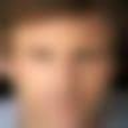

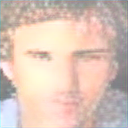

Epoch [26/80], Training Loss: 0.21000464562497106, Training PSNR: 5.201546189052607 dB, Test Loss: 0.3033223408154952, Test PSNR: 5.2040946789276905 dB
Epoch [27/80], Step[40/153], Loss: 0.20217753946781158, Adversarial Loss: 0.019572075456380844, Perceptual Loss: 0.6282569169998169, PSNR: 5.100414752960205 dB
Epoch [27/80], Step[80/153], Loss: 0.19797948002815247, Adversarial Loss: 0.019937679171562195, Perceptual Loss: 0.6134103536605835, PSNR: 4.955121040344238 dB
Epoch [27/80], Step[120/153], Loss: 0.2114076465368271, Adversarial Loss: 0.019523976370692253, Perceptual Loss: 0.659136176109314, PSNR: 4.6589813232421875 dB


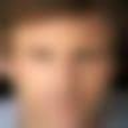

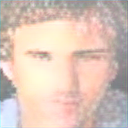

Epoch [27/80], Training Loss: 0.2070352906495138, Training PSNR: 5.204342570959353 dB, Test Loss: 0.3024215232103299, Test PSNR: 5.133154508395073 dB
Epoch [28/80], Step[40/153], Loss: 0.1950879991054535, Adversarial Loss: 0.019713815301656723, Perceptual Loss: 0.6042944192886353, PSNR: 5.064350128173828 dB
Epoch [28/80], Step[80/153], Loss: 0.20533572137355804, Adversarial Loss: 0.020231500267982483, Perceptual Loss: 0.6372455358505249, PSNR: 5.058866024017334 dB
Epoch [28/80], Step[120/153], Loss: 0.19934910535812378, Adversarial Loss: 0.018780365586280823, Perceptual Loss: 0.6206761598587036, PSNR: 4.666276454925537 dB


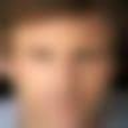

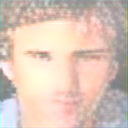

Epoch [28/80], Training Loss: 0.20431192774398654, Training PSNR: 5.206088312311111 dB, Test Loss: 0.30254292297057617, Test PSNR: 5.11501624645331 dB
Epoch [29/80], Step[40/153], Loss: 0.1822998821735382, Adversarial Loss: 0.018871253356337547, Perceptual Loss: 0.5636333227157593, PSNR: 5.186074256896973 dB
Epoch [29/80], Step[80/153], Loss: 0.1867695152759552, Adversarial Loss: 0.020384229719638824, Perceptual Loss: 0.5750018358230591, PSNR: 5.263502597808838 dB
Epoch [29/80], Step[120/153], Loss: 0.21463003754615784, Adversarial Loss: 0.01914127916097641, Perceptual Loss: 0.6707704067230225, PSNR: 5.273083686828613 dB


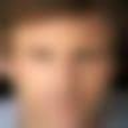

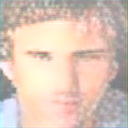

Epoch [29/80], Training Loss: 0.20161649789295943, Training PSNR: 5.2047418519562365 dB, Test Loss: 0.303888249091613, Test PSNR: 5.147834808398516 dB
Epoch [30/80], Step[40/153], Loss: 0.19569094479084015, Adversarial Loss: 0.020577240735292435, Perceptual Loss: 0.6042895317077637, PSNR: 5.509677886962891 dB
Epoch [30/80], Step[80/153], Loss: 0.2077929824590683, Adversarial Loss: 0.020337723195552826, Perceptual Loss: 0.645188570022583, PSNR: 4.731430530548096 dB
Epoch [30/80], Step[120/153], Loss: 0.19597847759723663, Adversarial Loss: 0.0193096362054348, Perceptual Loss: 0.6082057952880859, PSNR: 5.182056903839111 dB


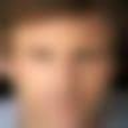

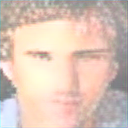

Epoch [30/80], Training Loss: 0.19944948552091138, Training PSNR: 5.200366855446809 dB, Test Loss: 0.3010947280205213, Test PSNR: 5.145682108707917 dB
Epoch [31/80], Step[40/153], Loss: 0.20473526418209076, Adversarial Loss: 0.019037121906876564, Perceptual Loss: 0.6380308866500854, PSNR: 5.195145130157471 dB
Epoch [31/80], Step[80/153], Loss: 0.18107688426971436, Adversarial Loss: 0.02065744809806347, Perceptual Loss: 0.5553889274597168, PSNR: 5.282720565795898 dB
Epoch [31/80], Step[120/153], Loss: 0.1967679113149643, Adversarial Loss: 0.020246505737304688, Perceptual Loss: 0.6086511611938477, PSNR: 4.71388053894043 dB


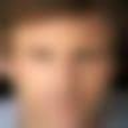

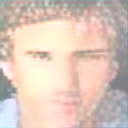

Epoch [31/80], Training Loss: 0.19572999031325572, Training PSNR: 5.200730058881971 dB, Test Loss: 0.30040052915230775, Test PSNR: 5.103142402110955 dB
Epoch [32/80], Step[40/153], Loss: 0.19083625078201294, Adversarial Loss: 0.020540274679660797, Perceptual Loss: 0.5881935358047485, PSNR: 4.934361457824707 dB
Epoch [32/80], Step[80/153], Loss: 0.18297836184501648, Adversarial Loss: 0.020286817103624344, Perceptual Loss: 0.5625919103622437, PSNR: 5.624866485595703 dB
Epoch [32/80], Step[120/153], Loss: 0.18880580365657806, Adversarial Loss: 0.019131653010845184, Perceptual Loss: 0.5847121477127075, PSNR: 4.782970428466797 dB


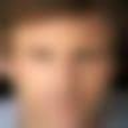

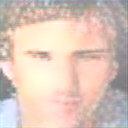

Epoch [32/80], Training Loss: 0.1928696363579993, Training PSNR: 5.208211665060006 dB, Test Loss: 0.29906279421769655, Test PSNR: 5.169589152702918 dB
Epoch [33/80], Step[40/153], Loss: 0.1962319314479828, Adversarial Loss: 0.019651416689157486, Perceptual Loss: 0.6082531213760376, PSNR: 5.7919697761535645 dB
Epoch [33/80], Step[80/153], Loss: 0.1890217661857605, Adversarial Loss: 0.021628139540553093, Perceptual Loss: 0.5796068906784058, PSNR: 4.938832759857178 dB
Epoch [33/80], Step[120/153], Loss: 0.19664430618286133, Adversarial Loss: 0.020635295659303665, Perceptual Loss: 0.6073319911956787, PSNR: 5.3044586181640625 dB


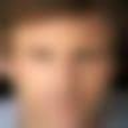

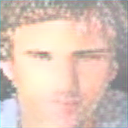

Epoch [33/80], Training Loss: 0.1905189320152881, Training PSNR: 5.196017414915795 dB, Test Loss: 0.3016804991624294, Test PSNR: 5.162753215202918 dB
Epoch [34/80], Step[40/153], Loss: 0.16902302205562592, Adversarial Loss: 0.02151266299188137, Perceptual Loss: 0.5132138729095459, PSNR: 5.1510233879089355 dB
Epoch [34/80], Step[80/153], Loss: 0.17097586393356323, Adversarial Loss: 0.020186156034469604, Perceptual Loss: 0.5228185057640076, PSNR: 4.905577182769775 dB
Epoch [34/80], Step[120/153], Loss: 0.19669733941555023, Adversarial Loss: 0.01988227851688862, Perceptual Loss: 0.6092658042907715, PSNR: 5.3690032958984375 dB


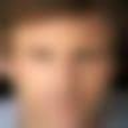

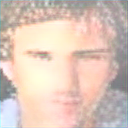

Epoch [34/80], Training Loss: 0.18842538499754238, Training PSNR: 5.201753036648619 dB, Test Loss: 0.2989545384278664, Test PSNR: 5.092266785792815 dB
Epoch [35/80], Step[40/153], Loss: 0.19460028409957886, Adversarial Loss: 0.01937340945005417, Perceptual Loss: 0.6034629940986633, PSNR: 5.362082481384277 dB
Epoch [35/80], Step[80/153], Loss: 0.1908482015132904, Adversarial Loss: 0.0196392722427845, Perceptual Loss: 0.5903357267379761, PSNR: 5.023041725158691 dB
Epoch [35/80], Step[120/153], Loss: 0.19456949830055237, Adversarial Loss: 0.02203129231929779, Perceptual Loss: 0.597158670425415, PSNR: 5.4203314781188965 dB


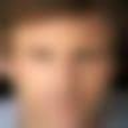

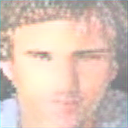

Epoch [35/80], Training Loss: 0.1864602155739965, Training PSNR: 5.202222873962003 dB, Test Loss: 0.2980516453584035, Test PSNR: 5.137982539641551 dB
Epoch [36/80], Step[40/153], Loss: 0.19989418983459473, Adversarial Loss: 0.020694918930530548, Perceptual Loss: 0.6180257797241211, PSNR: 5.077145576477051 dB
Epoch [36/80], Step[80/153], Loss: 0.17974133789539337, Adversarial Loss: 0.019386691972613335, Perceptual Loss: 0.5539021492004395, PSNR: 5.218382358551025 dB
Epoch [36/80], Step[120/153], Loss: 0.17918071150779724, Adversarial Loss: 0.020699042826890945, Perceptual Loss: 0.5489712953567505, PSNR: 5.4732818603515625 dB


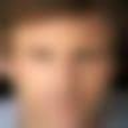

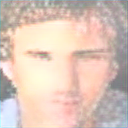

Epoch [36/80], Training Loss: 0.18454874613705805, Training PSNR: 5.208113414789337 dB, Test Loss: 0.2979634606685394, Test PSNR: 5.0868066396468725 dB
Epoch [37/80], Step[40/153], Loss: 0.19095894694328308, Adversarial Loss: 0.0206364206969738, Perceptual Loss: 0.5883781313896179, PSNR: 5.189330101013184 dB
Epoch [37/80], Step[80/153], Loss: 0.17971207201480865, Adversarial Loss: 0.02170783281326294, Perceptual Loss: 0.5483886003494263, PSNR: 5.462450981140137 dB
Epoch [37/80], Step[120/153], Loss: 0.18780136108398438, Adversarial Loss: 0.020017851144075394, Perceptual Loss: 0.5792961716651917, PSNR: 4.786819934844971 dB


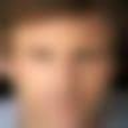

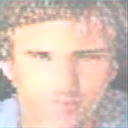

Epoch [37/80], Training Loss: 0.18177404571202846, Training PSNR: 5.203309688692778 dB, Test Loss: 0.29681402903336745, Test PSNR: 5.100165049235026 dB
Epoch [38/80], Step[40/153], Loss: 0.17202699184417725, Adversarial Loss: 0.01949518546462059, Perceptual Loss: 0.5279344916343689, PSNR: 5.414833068847656 dB
Epoch [38/80], Step[80/153], Loss: 0.19498930871486664, Adversarial Loss: 0.02062118798494339, Perceptual Loss: 0.6018482446670532, PSNR: 5.040950298309326 dB
Epoch [38/80], Step[120/153], Loss: 0.17824116349220276, Adversarial Loss: 0.018510088324546814, Perceptual Loss: 0.5509469509124756, PSNR: 5.0186920166015625 dB


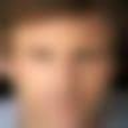

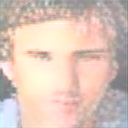

Epoch [38/80], Training Loss: 0.17974181599866332, Training PSNR: 5.1942942812551856 dB, Test Loss: 0.2964675254546679, Test PSNR: 5.113521698193672 dB
Epoch [39/80], Step[40/153], Loss: 0.1851617693901062, Adversarial Loss: 0.021017124876379967, Perceptual Loss: 0.5681658983230591, PSNR: 5.097491264343262 dB
Epoch [39/80], Step[80/153], Loss: 0.18081441521644592, Adversarial Loss: 0.02121805213391781, Perceptual Loss: 0.5532059073448181, PSNR: 5.4506635665893555 dB
Epoch [39/80], Step[120/153], Loss: 0.17062227427959442, Adversarial Loss: 0.02007341757416725, Perceptual Loss: 0.5219029188156128, PSNR: 4.967612266540527 dB


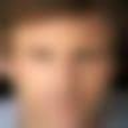

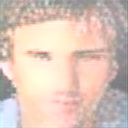

Epoch [39/80], Training Loss: 0.1776956141579385, Training PSNR: 5.205184693429985 dB, Test Loss: 0.2974635721781315, Test PSNR: 5.063727525564341 dB
Epoch [40/80], Step[40/153], Loss: 0.1734149307012558, Adversarial Loss: 0.021343469619750977, Perceptual Loss: 0.5282483100891113, PSNR: 4.973240375518799 dB
Epoch [40/80], Step[80/153], Loss: 0.1834499090909958, Adversarial Loss: 0.01969650387763977, Perceptual Loss: 0.56554114818573, PSNR: 5.401208400726318 dB
Epoch [40/80], Step[120/153], Loss: 0.16555091738700867, Adversarial Loss: 0.020015200600028038, Perceptual Loss: 0.5051342248916626, PSNR: 4.831661701202393 dB


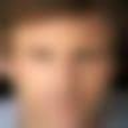

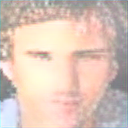

Epoch [40/80], Training Loss: 0.17607801461141873, Training PSNR: 5.199435754539141 dB, Test Loss: 0.2950910486471959, Test PSNR: 5.081732859978309 dB
Epoch [41/80], Step[40/153], Loss: 0.17594242095947266, Adversarial Loss: 0.02204289101064205, Perceptual Loss: 0.535041332244873, PSNR: 5.391988277435303 dB
Epoch [41/80], Step[80/153], Loss: 0.18599508702754974, Adversarial Loss: 0.020196642726659775, Perceptual Loss: 0.5728580951690674, PSNR: 5.215831756591797 dB
Epoch [41/80], Step[120/153], Loss: 0.17221322655677795, Adversarial Loss: 0.019728418439626694, Perceptual Loss: 0.5280110836029053, PSNR: 4.648065090179443 dB


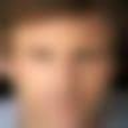

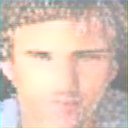

Epoch [41/80], Training Loss: 0.17478205429183113, Training PSNR: 5.200170211542666 dB, Test Loss: 0.296771560723965, Test PSNR: 5.119285277831248 dB
Epoch [42/80], Step[40/153], Loss: 0.17303666472434998, Adversarial Loss: 0.01951569877564907, Perceptual Loss: 0.5312522649765015, PSNR: 5.037615776062012 dB
Epoch [42/80], Step[80/153], Loss: 0.19270271062850952, Adversarial Loss: 0.023367762565612793, Perceptual Loss: 0.5878175497055054, PSNR: 5.267851829528809 dB
Epoch [42/80], Step[120/153], Loss: 0.17280785739421844, Adversarial Loss: 0.01963035762310028, Perceptual Loss: 0.5302219986915588, PSNR: 5.534403324127197 dB


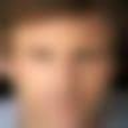

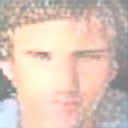

Epoch [42/80], Training Loss: 0.1727571051105175, Training PSNR: 5.201414837556727 dB, Test Loss: 0.296145172837453, Test PSNR: 5.0876000966781225 dB
Epoch [43/80], Step[40/153], Loss: 0.1795169562101364, Adversarial Loss: 0.018767064437270164, Perceptual Loss: 0.5546000599861145, PSNR: 4.987034797668457 dB
Epoch [43/80], Step[80/153], Loss: 0.17244108021259308, Adversarial Loss: 0.01920231431722641, Perceptual Loss: 0.5299981832504272, PSNR: 5.176224231719971 dB
Epoch [43/80], Step[120/153], Loss: 0.15423960983753204, Adversarial Loss: 0.021015873178839684, Perceptual Loss: 0.46509498357772827, PSNR: 5.234317779541016 dB


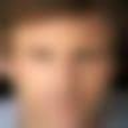

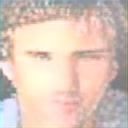

Epoch [43/80], Training Loss: 0.1703618657744788, Training PSNR: 5.2014990756714266 dB, Test Loss: 0.29528116568540913, Test PSNR: 5.064470101625491 dB
Epoch [44/80], Step[40/153], Loss: 0.17599941790103912, Adversarial Loss: 0.019985614344477654, Perceptual Loss: 0.5400316119194031, PSNR: 5.4024128913879395 dB
Epoch [44/80], Step[80/153], Loss: 0.1656908094882965, Adversarial Loss: 0.01916310004889965, Perceptual Loss: 0.5075887441635132, PSNR: 5.085048675537109 dB
Epoch [44/80], Step[120/153], Loss: 0.1459941416978836, Adversarial Loss: 0.0222928449511528, Perceptual Loss: 0.43463051319122314, PSNR: 5.427783012390137 dB


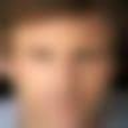

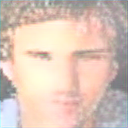

Epoch [44/80], Training Loss: 0.1684938155942493, Training PSNR: 5.2064461396410575 dB, Test Loss: 0.294905152458411, Test PSNR: 5.080530368364775 dB
Epoch [45/80], Step[40/153], Loss: 0.1758422702550888, Adversarial Loss: 0.02023472636938095, Perceptual Loss: 0.5389264822006226, PSNR: 5.126795291900635 dB
Epoch [45/80], Step[80/153], Loss: 0.17562194168567657, Adversarial Loss: 0.021220680326223373, Perceptual Loss: 0.5358915328979492, PSNR: 5.317817687988281 dB
Epoch [45/80], Step[120/153], Loss: 0.17348352074623108, Adversarial Loss: 0.0217483788728714, Perceptual Loss: 0.527532160282135, PSNR: 5.336592674255371 dB


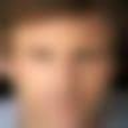

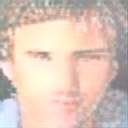

Epoch [45/80], Training Loss: 0.16681373995893142, Training PSNR: 5.199536937514162 dB, Test Loss: 0.2942649638041472, Test PSNR: 5.071378689545852 dB
Epoch [46/80], Step[40/153], Loss: 0.1574265956878662, Adversarial Loss: 0.018900014460086823, Perceptual Loss: 0.4806552827358246, PSNR: 5.576148509979248 dB
Epoch [46/80], Step[80/153], Loss: 0.1656080037355423, Adversarial Loss: 0.020603185519576073, Perceptual Loss: 0.5039525628089905, PSNR: 5.093593120574951 dB
Epoch [46/80], Step[120/153], Loss: 0.1498156040906906, Adversarial Loss: 0.01978948339819908, Perceptual Loss: 0.45320987701416016, PSNR: 4.760819911956787 dB


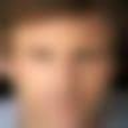

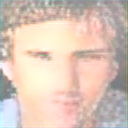

Epoch [46/80], Training Loss: 0.16541610716604718, Training PSNR: 5.196236610412598 dB, Test Loss: 0.294832645318447, Test PSNR: 5.11278868944217 dB
Epoch [47/80], Step[40/153], Loss: 0.15483428537845612, Adversarial Loss: 0.01990332081913948, Perceptual Loss: 0.469673216342926, PSNR: 5.568602561950684 dB
Epoch [47/80], Step[80/153], Loss: 0.17632050812244415, Adversarial Loss: 0.0210198275744915, Perceptual Loss: 0.5386887192726135, PSNR: 5.11513614654541 dB
Epoch [47/80], Step[120/153], Loss: 0.15300747752189636, Adversarial Loss: 0.020481031388044357, Perceptual Loss: 0.46223583817481995, PSNR: 5.32454252243042 dB


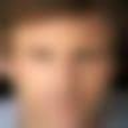

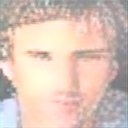

Epoch [47/80], Training Loss: 0.16427724345836764, Training PSNR: 5.195830797058305 dB, Test Loss: 0.294802080362271, Test PSNR: 5.14794827118898 dB
Epoch [48/80], Step[40/153], Loss: 0.1507730931043625, Adversarial Loss: 0.020245909690856934, Perceptual Loss: 0.4553365111351013, PSNR: 5.246331214904785 dB
Epoch [48/80], Step[80/153], Loss: 0.15897710621356964, Adversarial Loss: 0.021603351458907127, Perceptual Loss: 0.4795158803462982, PSNR: 4.986706733703613 dB
Epoch [48/80], Step[120/153], Loss: 0.15988776087760925, Adversarial Loss: 0.020800190046429634, Perceptual Loss: 0.48442542552948, PSNR: 5.397251129150391 dB


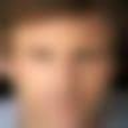

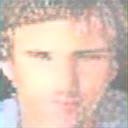

Epoch [48/80], Training Loss: 0.1629694009723227, Training PSNR: 5.199354648590088 dB, Test Loss: 0.29318014131142545, Test PSNR: 5.07722895573347 dB
Epoch [49/80], Step[40/153], Loss: 0.15177293121814728, Adversarial Loss: 0.019860558211803436, Perceptual Loss: 0.45956844091415405, PSNR: 5.396915435791016 dB
Epoch [49/80], Step[80/153], Loss: 0.16493774950504303, Adversarial Loss: 0.020806357264518738, Perceptual Loss: 0.501244306564331, PSNR: 5.058496475219727 dB
Epoch [49/80], Step[120/153], Loss: 0.15293408930301666, Adversarial Loss: 0.02064744010567665, Perceptual Loss: 0.46160292625427246, PSNR: 5.241775035858154 dB


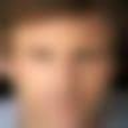

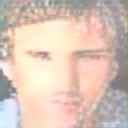

Epoch [49/80], Training Loss: 0.1606359000689064, Training PSNR: 5.19607361001906 dB, Test Loss: 0.29283864910785967, Test PSNR: 5.1493178269802 dB
Epoch [50/80], Step[40/153], Loss: 0.14779050648212433, Adversarial Loss: 0.020528187975287437, Perceptual Loss: 0.44473591446876526, PSNR: 5.387042999267578 dB
Epoch [50/80], Step[80/153], Loss: 0.15779981017112732, Adversarial Loss: 0.021520566195249557, Perceptual Loss: 0.47578468918800354, PSNR: 5.2629923820495605 dB
Epoch [50/80], Step[120/153], Loss: 0.15798449516296387, Adversarial Loss: 0.0204995796084404, Perceptual Loss: 0.47878265380859375, PSNR: 5.5295586585998535 dB


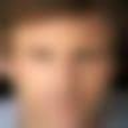

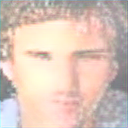

Epoch [50/80], Training Loss: 0.15916234050311295, Training PSNR: 5.196134595309987 dB, Test Loss: 0.2930315389082982, Test PSNR: 5.089257735472459 dB
Epoch [51/80], Step[40/153], Loss: 0.14969474077224731, Adversarial Loss: 0.020645199343562126, Perceptual Loss: 0.45081034302711487, PSNR: 4.942045211791992 dB
Epoch [51/80], Step[80/153], Loss: 0.15121981501579285, Adversarial Loss: 0.01931614801287651, Perceptual Loss: 0.4589950442314148, PSNR: 5.215181827545166 dB
Epoch [51/80], Step[120/153], Loss: 0.16086629033088684, Adversarial Loss: 0.021985333412885666, Perceptual Loss: 0.48492181301116943, PSNR: 5.815832138061523 dB


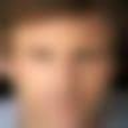

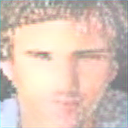

Epoch [51/80], Training Loss: 0.15823552499409593, Training PSNR: 5.201107140460046 dB, Test Loss: 0.2937807303208571, Test PSNR: 5.053494453430176 dB
Epoch [52/80], Step[40/153], Loss: 0.14269885420799255, Adversarial Loss: 0.021306030452251434, Perceptual Loss: 0.4259487986564636, PSNR: 4.724895477294922 dB
Epoch [52/80], Step[80/153], Loss: 0.14949561655521393, Adversarial Loss: 0.019546933472156525, Perceptual Loss: 0.4527091979980469, PSNR: 5.369953632354736 dB
Epoch [52/80], Step[120/153], Loss: 0.14558756351470947, Adversarial Loss: 0.020645270124077797, Perceptual Loss: 0.43711960315704346, PSNR: 5.136907577514648 dB


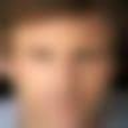

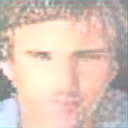

Epoch [52/80], Training Loss: 0.15684299813766106, Training PSNR: 5.201852729897094 dB, Test Loss: 0.29304354122051823, Test PSNR: 5.111326590562478 dB
Epoch [53/80], Step[40/153], Loss: 0.15936939418315887, Adversarial Loss: 0.02104736492037773, Perceptual Loss: 0.4821208119392395, PSNR: 5.525002956390381 dB
Epoch [53/80], Step[80/153], Loss: 0.1660948097705841, Adversarial Loss: 0.020621852949261665, Perceptual Loss: 0.5055317282676697, PSNR: 5.326837539672852 dB
Epoch [53/80], Step[120/153], Loss: 0.15441875159740448, Adversarial Loss: 0.019853517413139343, Perceptual Loss: 0.46840426325798035, PSNR: 5.456228256225586 dB


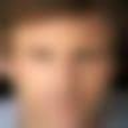

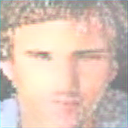

Epoch [53/80], Training Loss: 0.15571965170062446, Training PSNR: 5.198407453649184 dB, Test Loss: 0.2920160931654466, Test PSNR: 5.12313557893802 dB


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models import vgg19
from basicsr.archs.discriminator_arch import VGGStyleDiscriminator
from basicsr.losses.gan_loss import GANLoss
from RealESRGAN import RealESRGAN
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from torch.optim.lr_scheduler import StepLR

class FineTuningLoss(nn.Module):
    def __init__(self, lambda_adv=1.0, lambda_perceptual=1.0):
        super(FineTuningLoss, self).__init__()
        self.lambda_adv = lambda_adv
        self.lambda_perceptual = lambda_perceptual
        self.adversarial_loss = GANLoss('lsgan', 1.0, 0.0, 1.0)
        self.vgg = vgg19(pretrained=True).features[:18].to(device).eval()
        for param in self.vgg.parameters():
            param.requires_grad = False

    def forward(self, sr, hr, discriminator):
        # Adversarial Loss
        adversarial_loss = self.adversarial_loss(sr, True, is_disc=False)

        # Perceptual Loss
        sr_features = self.vgg(sr)
        hr_features = self.vgg(hr)
        perceptual_loss = F.mse_loss(sr_features, hr_features)

        # Total Loss
        total_loss = self.lambda_adv * adversarial_loss + self.lambda_perceptual * perceptual_loss

        return total_loss, adversarial_loss, perceptual_loss

def calculate_psnr(img1, img2):
    mse = F.mse_loss(img1, img2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 1.0  # Since the images are normalized to [0, 1]
    psnr = 20 * torch.log10(PIXEL_MAX / torch.sqrt(mse))
    return psnr

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_scale = 2
model = RealESRGAN(device, scale=model_scale)
discriminator = VGGStyleDiscriminator(num_in_ch = 3, num_feat=64).to(device)
model.load_weights(f'weights/RealESRGAN_x{model_scale}.pth')
optimizer_esrgan = torch.optim.Adam(model.model.parameters(), lr=1e-4)
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=1e-4)
loss_fn = FineTuningLoss(lambda_adv= 0.7, lambda_perceptual=0.3)

scheduler_esrgan = StepLR(optimizer_esrgan, step_size = 6, gamma = 0.95)
scheduler_discriminator = StepLR(optimizer_discriminator, step_size = 6, gamma=0.95)

# Define normalization transform
normalize = transforms.Compose([
    transforms.ToTensor(),
])

num_epochs = 80
for epoch in range(num_epochs):
    model.model.train()
    discriminator.train()

    train_loss = 0
    train_psnr = 0
    tl_list = []
    tl_psnr = []

    for i, (low_resolution, high_resolution) in enumerate(train_loader):
        low_resolution = low_resolution.to(device)
        high_resolution = high_resolution.to(device)

        optimizer_esrgan.zero_grad()
        optimizer_discriminator.zero_grad()

        obtained_resolution = model.model(low_resolution)
        loss, adversarial_loss, perceptual_loss = loss_fn(obtained_resolution, high_resolution, discriminator)

        loss.backward()
        optimizer_esrgan.step()
        optimizer_discriminator.step()

        # Calculate PSNR for training images
        psnr_value = calculate_psnr(obtained_resolution, high_resolution).item()
        train_psnr += psnr_value
        train_loss += loss.item()

        if (i + 1) % 40 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step[{i + 1}/{len(train_loader)}], Loss: {loss.item()}, Adversarial Loss: {adversarial_loss.item()}, Perceptual Loss: {perceptual_loss.item()}, PSNR: {psnr_value} dB')

    train_loss /= len(train_loader)
    tl_list.append(train_loss)
    train_psnr /= len(train_loader)
    tl_psnr.append(train_psnr)

    scheduler_esrgan.step()
    scheduler_discriminator.step()

    model.model.eval()
    image = cv2.imread("/content/r3.jpg")
    resized_image = cv2.resize(image, (64, 64))
    temp = cv2.resize(image, (128, 128))
    cv2_imshow(temp)

    preprocess = transforms.Compose([
        transforms.ToTensor(),
    ])
    input_tensor = preprocess(resized_image).unsqueeze(0).to(device)

    with torch.no_grad():
        output_tensor = model.model(input_tensor)
    output_array = output_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
    output_array = np.clip(output_array * 200, 0, 255).astype(np.uint8)
    cv2_imshow(output_array)

    discriminator.eval()
    test_loss = 0
    test_psnr = 0
    tel_list = []
    tel_psnr = []

    with torch.no_grad():
        for low_resolution, high_resolution in test_loader:
            low_resolution = low_resolution.to(device)
            high_resolution = high_resolution.to(device)
            resolution_images = model.model(low_resolution)
            loss, adversarial_loss, perceptual_loss = loss_fn(resolution_images, high_resolution, discriminator)
            test_loss += loss.item()
            test_psnr += calculate_psnr(resolution_images, high_resolution).item()

    test_loss /= len(test_loader)
    tel_list.append(test_loss)
    test_psnr /= len(test_loader)
    tel_psnr.append(test_psnr)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {train_loss}, Training PSNR: {train_psnr} dB, Test Loss: {test_loss}, Test PSNR: {test_psnr} dB')


In [ ]:
import torch
import torch.nn as nn
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model.model.state_dict(), f)

In [ ]:
import matplotlib.pyplot as plt

print(tl_list)
print(len(tl_list))
print(tel_list)
print(len(tel_list))

[]
0
[0.2920160931654466]
1


In [ ]:
import torch
torch.save(model.model.state_dict(), 'fine_tuned_pratice.pth')


In [ ]:
model.model.load_state_dict(torch.load('fine_tuned_pratice.pth'))

<All keys matched successfully>

In [ ]:
model.model.eval()

RRDBNet(
  (conv_first): Conv2d(12, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (body): Sequential(
    (0): RRDB(
      (rdb1): ResidualDenseBlock(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv3): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv4): Conv2d(160, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv5): Conv2d(192, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
      )
      (rdb2): ResidualDenseBlock(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv3): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv4): Conv2d(160, 32, kernel_size=(3, 3), stride=(1, 1),

In [ ]:
!pip install pillow


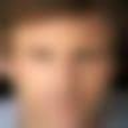

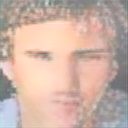

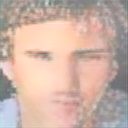

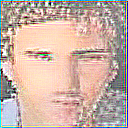

In [ ]:
import cv2
import torch
import numpy as np
from torchvision import transforms
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/r3.jpg")

resized_image = cv2.resize(image,(64, 64))
temp = cv2.resize(image ,(128,128))
cv2_imshow(temp)
# Convert resized image to tensor
preprocess = transforms.Compose([
    transforms.ToTensor(),
])
input_tensor = preprocess(resized_image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    output_tensor = model.model(input_tensor.to(device))

# Convert output tensor to NumPy array
output_array = output_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()

image = np.clip(output_array * 180, 0 ,255).astype(np.uint8)
cv2_imshow(image)
# Apply Non-Local Means Denoising
# denoised_image = cv2.GaussianBlur(image, (3,3), 0)

# Define a sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Apply the sharpening kernel to the denoised image
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

# Display the results
cv2_imshow(image)
# cv2_imshow(denoised_image)
cv2_imshow(sharpened_image)

In [ ]:
import cv2
import torch
import numpy as np
from torchvision import transforms
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/temporary1.jpg")

resized_image = cv2.resize(image,(64, 64))
temp = cv2.resize(image ,(128,128))
cv2_imshow(temp)
# Convert resized image to tensor
preprocess = transforms.Compose([
    transforms.ToTensor(),
])
input_tensor = preprocess(resized_image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    output_tensor = model.model(input_tensor.to(device))

# Convert output tensor to NumPy array
output_array = output_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()

image = np.clip(output_array * 180, 0 ,255).astype(np.uint8)
cv2_imshow(image)
# Apply Non-Local Means Denoising
denoised_image = cv2.GaussianBlur(image, (3,3), 0)

# Define a sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Apply the sharpening kernel to the denoised image
sharpened_image = cv2.filter2D(denoised_image, -1, sharpening_kernel)

# Display the results
cv2_imshow( image)
cv2_imshow(denoised_image)
cv2_imshow(sharpened_image)